In [1]:
pip install git+https://github.com/cloneofsimo/lora.git

  Cloning https://github.com/cloneofsimo/lora.git to /tmp/pip-req-build-6i_rfmgl
  Running command git clone --filter=blob:none --quiet https://github.com/cloneofsimo/lora.git /tmp/pip-req-build-6i_rfmgl
  Resolved https://github.com/cloneofsimo/lora.git to commit bdd51b04c49fa90a88919a19850ec3b4cf3c5ecd
  Preparing metadata (setup.py) ... done
Note: you may need to restart the kernel to use updated packages.


/opt/conda/envs/zero123/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|██████████| 50/50 [00:03<00:00, 16.10it/s]


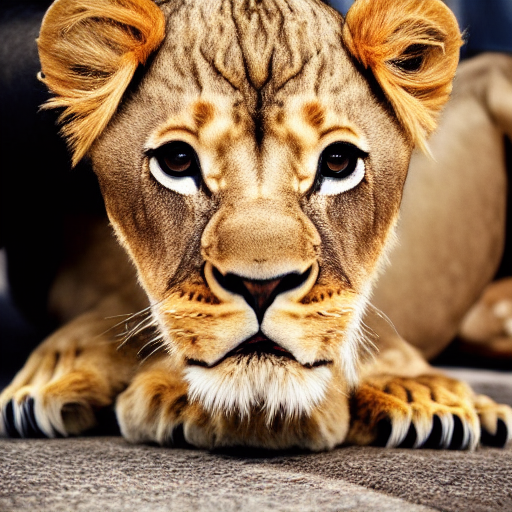

In [2]:
from diffusers import StableDiffusionPipeline, EulerAncestralDiscreteScheduler
import torch

model_id = "runwayml/stable-diffusion-v1-5"

pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16).to(
    "cuda"
)
pipe.scheduler = EulerAncestralDiscreteScheduler.from_config(pipe.scheduler.config)

prompt = "style of <s1><s2>, baby lion"
torch.manual_seed(0)
image = pipe(prompt, num_inference_steps=50, guidance_scale=7).images[0]

image 

In [4]:
from lora_diffusion import tune_lora_scale, patch_pipe

patch_pipe(
    pipe,
    "../example_loras/lora_illust.safetensors",
    patch_text=True,
    patch_ti=True,
    patch_unet=True,
)

tune_lora_scale(pipe.unet, 1.00)
tune_lora_scale(pipe.text_encoder, 1.00)

torch.manual_seed(0)
image = pipe(prompt, num_inference_steps=50, guidance_scale=7).images[0]

image

FileNotFoundError: No such file or directory: "../example_loras/lora_illust.safetensors"